# **BOOTCAMP on Deep Learning and Computer Vision**
# **@Siliguri Institute of Technology, India**
# Week-7 | Date: Nov 24, 2023


In this session you will be learning how to checkpoint a model and also restart training from an existing checkpoint. In the second session you will implement Transfer learning/fine-tuning.

Designing of AlexNet architecture will also be discussed.

So lets get started!

## Tutorial:
1. Checkpointing or saving trained model
2. Transfer learning
3. Classic CNNs

## Tasks for this week:

1. Implementation of CNN for Dogs and Cats classification using Keras API.
2. Save the snapshot of trained model using checkpoint
3. Loading the weights of trained model and start training again.
3. Using out-of-the-box models for classification
4. Transfer learning/fine-tuning from already trained model
5. Implement AlexNet.


##Task-1: Implementing CNN for Dogs and Cats classification using Keras API

### Step 1: Import required packages

we will need tensorflow, numpy, os and keras


In [1]:
import os
import tensorflow as tf
import zipfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Step 2: Download the Cats & Dogs dataset

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-11-24 11:39:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   183MB/s    in 0.4s    

2023-11-24 11:39:05 (183 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### Step 3:  Design the CNN Architecture

Design the following CNN architecture:


<img src='http://drive.google.com/uc?export=view&id=1EAWFwp7T92q3Lm1ZrX9A2-wnvhfAfzSF' alt='Conv'>

Input: $150 X 150 X 3$ image

No. of filters:
- Conv1 : 32, 3x3
- Conv2 : 64, 3x3
- Conv4 : 128, 3x3
- Conv4 : 128, 3x3

Activation function in CONV layer: Relu

Pool: MaxPooling, 2x2

FC Layer: 512 nodes, Activation : ReLu

Activation function in Output layer : sigmoid,

**Hint:** Use Conv2D(), MaxPooling2D(), Flatten(), and Dense()

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


### Step 4. Model Compilation

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### Step 5. Using Image generator to load images and generate labels automatically. Image generator also resizes the images.

In [6]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


##Task-2: Saving the snapshot of model as checkpoint



###Step 6: Checkpointing

In [8]:
#checkpoint = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=1, save_freq='epoch')
filepath='/tmp/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 7. Training the model

In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      callbacks = [checkpoint],
      verbose=2)

Epoch 1/10
100/100 - 16s - loss: 0.6935 - acc: 0.5230 - val_loss: 0.6826 - val_acc: 0.4900 - 16s/epoch - 158ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 - 4s - loss: 0.6737 - acc: 0.5890 - val_loss: 0.6759 - val_acc: 0.5300 - 4s/epoch - 41ms/step
Epoch 3/10
100/100 - 4s - loss: 0.6470 - acc: 0.6245 - val_loss: 0.6731 - val_acc: 0.6050 - 4s/epoch - 40ms/step
Epoch 4/10
100/100 - 5s - loss: 0.6061 - acc: 0.6730 - val_loss: 0.5752 - val_acc: 0.7200 - 5s/epoch - 48ms/step
Epoch 5/10
100/100 - 4s - loss: 0.5697 - acc: 0.7010 - val_loss: 0.5308 - val_acc: 0.7450 - 4s/epoch - 37ms/step
Epoch 6/10
100/100 - 4s - loss: 0.5498 - acc: 0.7150 - val_loss: 0.5906 - val_acc: 0.6600 - 4s/epoch - 39ms/step
Epoch 7/10
100/100 - 5s - loss: 0.5236 - acc: 0.7375 - val_loss: 0.5658 - val_acc: 0.7150 - 5s/epoch - 52ms/step
Epoch 8/10
100/100 - 4s - loss: 0.5005 - acc: 0.7530 - val_loss: 0.5830 - val_acc: 0.6900 - 4s/epoch - 39ms/step
Epoch 9/10
100/100 - 4s - loss: 0.4699 - acc: 0.7825 - val_loss: 0.6776 - val_acc: 0.6350 - 4s/epoch - 41ms/step
Epoch 10/10
100/100 - 4s - loss: 0.4451 - acc: 0.7925 - val_loss: 0.5435 - val_acc: 0.6900 - 4s/epoch - 40m

##Task 3: Loading the weights of trained model and start training again.

### Step 8.  Retraining from saved model

In [12]:
## Go to the /tmp folder and copy the name of the last saved model
model_modify=tf.keras.models.load_model('/tmp/weights.10-0.54.hdf5')

### Step 9. Compile the modified model

In [13]:
model_modify.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])
model_modify.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [14]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
filepath='/tmp/weights_modified.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')


In [16]:
# Train the model
history = model_modify.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      callbacks = [checkpoint],
      verbose=2)

Epoch 1/10
100/100 - 6s - loss: 0.4296 - acc: 0.7985 - val_loss: 0.5466 - val_acc: 0.7350 - 6s/epoch - 56ms/step
Epoch 2/10
100/100 - 4s - loss: 0.3939 - acc: 0.8220 - val_loss: 0.5466 - val_acc: 0.7200 - 4s/epoch - 36ms/step
Epoch 3/10
100/100 - 5s - loss: 0.3697 - acc: 0.8360 - val_loss: 0.5572 - val_acc: 0.7100 - 5s/epoch - 51ms/step
Epoch 4/10
100/100 - 4s - loss: 0.3629 - acc: 0.8435 - val_loss: 0.5787 - val_acc: 0.7150 - 4s/epoch - 36ms/step
Epoch 5/10
100/100 - 4s - loss: 0.3304 - acc: 0.8575 - val_loss: 0.5910 - val_acc: 0.7250 - 4s/epoch - 42ms/step
Epoch 6/10
100/100 - 6s - loss: 0.3008 - acc: 0.8800 - val_loss: 0.6069 - val_acc: 0.7450 - 6s/epoch - 57ms/step
Epoch 7/10
100/100 - 4s - loss: 0.2850 - acc: 0.8770 - val_loss: 0.5277 - val_acc: 0.7200 - 4s/epoch - 37ms/step
Epoch 8/10
100/100 - 4s - loss: 0.2619 - acc: 0.8920 - val_loss: 0.5567 - val_acc: 0.7650 - 4s/epoch - 40ms/step
Epoch 9/10
100/100 - 6s - loss: 0.2353 - acc: 0.9085 - val_loss: 0.6183 - val_acc: 0.7150 - 6s/e

## Task 4: Using out-of-the-box models for classification

## Task 5: Transfer Learning

[How to use pretrained networks for out of the box classification](https://keras.io/applications/)

### Step 1. Mount the google drive.

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
%cd /content/gdrive/MyDrive/42028/Week7
!unzip images.zip
%cd images

/content/gdrive/MyDrive/42028/Week7
Archive:  images.zip
replace images/cat.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace images/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: images/cat.0.jpg        
  inflating: images/dog.10.jpg       
/content/gdrive/MyDrive/42028/Week7/images


### Step 2. Using ResNet50 pretrained model for classification

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n04493381', 'tub', 0.063863255), ('n02123597', 'Siamese_cat', 0.058763664), ('n02124075', 'Egyptian_cat', 0.049216993)]


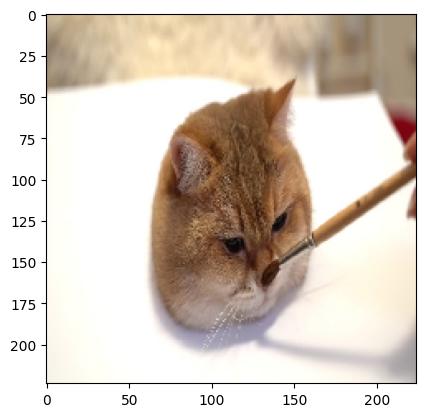

In [18]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

# Load the ResNet50 model with pretrained weights
model = ResNet50(weights='imagenet')

img_path = '/content/gdrive/MyDrive/42028/Week7/images/cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

### Step 3: Transfer learning

We will use the VGG16 CNN architecture as the base model and adapt/re-train the FC layers to Dogs and Cats classification task.

VGG16 CNN architecture is given below:

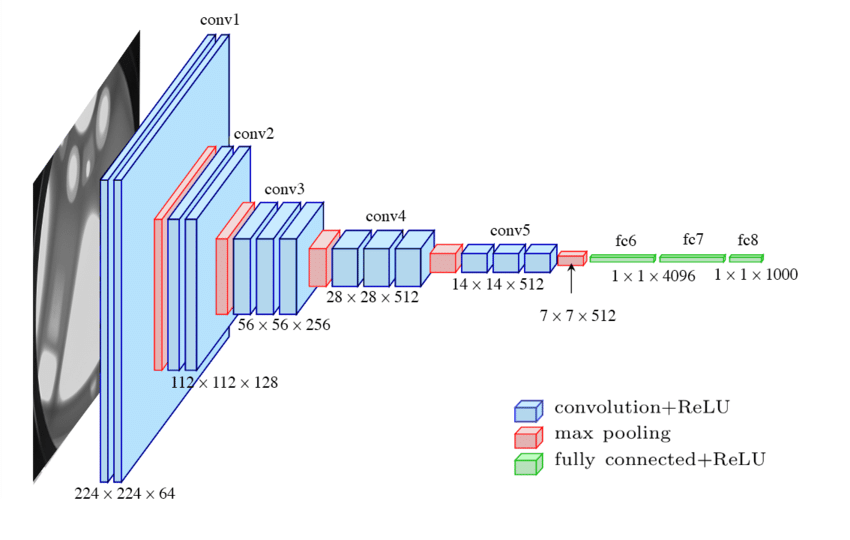

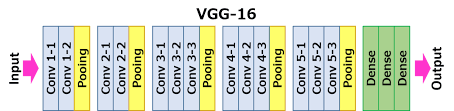

In [19]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))


from keras import models
from keras import layers
from keras import optimizers

# Load the CONV layers of VGG16 model and add the FC layers

model = models.Sequential()
model.add(conv_base)
#model.pop()
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



58889256/58889256 [==============================] - 2s 0us/step


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
conv_base.summary()
#conv_base.layers.pop()
#conv_base.layers.pop()
#conv_base.layers.pop()
for layer in conv_base.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in conv_base.layers:
    print(layer, layer.trainable)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [22]:
#model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 9177089 (35.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


### Step 4:  Training CNN with ImageDataGenerator

In [23]:
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [25]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/10


<ipython-input-25-49105c251d86>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 - 25s - loss: 0.4942 - acc: 0.7560 - val_loss: 0.2414 - val_acc: 0.8920 - 25s/epoch - 247ms/step
Epoch 2/10
100/100 - 20s - loss: 0.3405 - acc: 0.8445 - val_loss: 0.2077 - val_acc: 0.9150 - 20s/epoch - 195ms/step
Epoch 3/10
100/100 - 20s - loss: 0.2827 - acc: 0.8865 - val_loss: 0.2085 - val_acc: 0.9200 - 20s/epoch - 197ms/step
Epoch 4/10
100/100 - 20s - loss: 0.2307 - acc: 0.9040 - val_loss: 0.4036 - val_acc: 0.8380 - 20s/epoch - 196ms/step
Epoch 5/10
100/100 - 20s - loss: 0.2335 - acc: 0.9130 - val_loss: 0.3205 - val_acc: 0.9090 - 20s/epoch - 200ms/step
Epoch 6/10
100/100 - 20s - loss: 0.2380 - acc: 0.9115 - val_loss: 0.1879 - val_acc: 0.9300 - 20s/epoch - 196ms/step
Epoch 7/10
100/100 - 20s - loss: 0.1991 - acc: 0.9185 - val_loss: 0.1883 - val_acc: 0.9350 - 20s/epoch - 197ms/step
Epoch 8/10
100/100 - 20s - loss: 0.1770 - acc: 0.9265 - val_loss: 0.1622 - val_acc: 0.9430 - 20s/epoch - 196ms/step
Epoch 9/10
100/100 - 20s - loss: 0.1864 - acc: 0.9305 - val_loss: 0.2214 - val_acc:

### Step 5:  Visualization of results

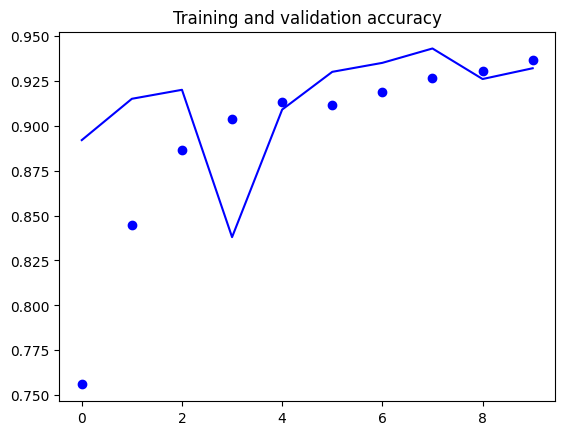

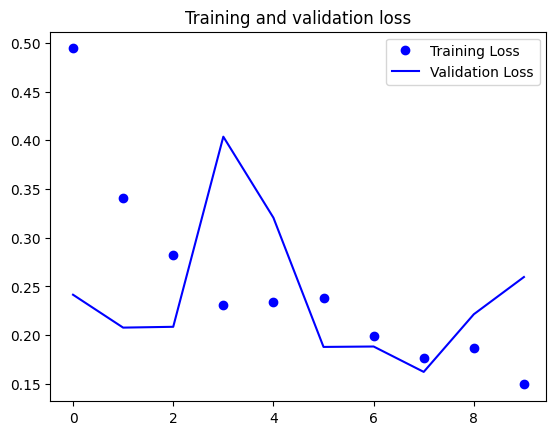

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 6: AlexNet implementation

The Alexnet CNN architecture is show in the diagram given below:

<!-- ![alt text](https://www.oreilly.com/api/v2/epubs/9781491980446/files/assets/tfdl_0106.png) -->
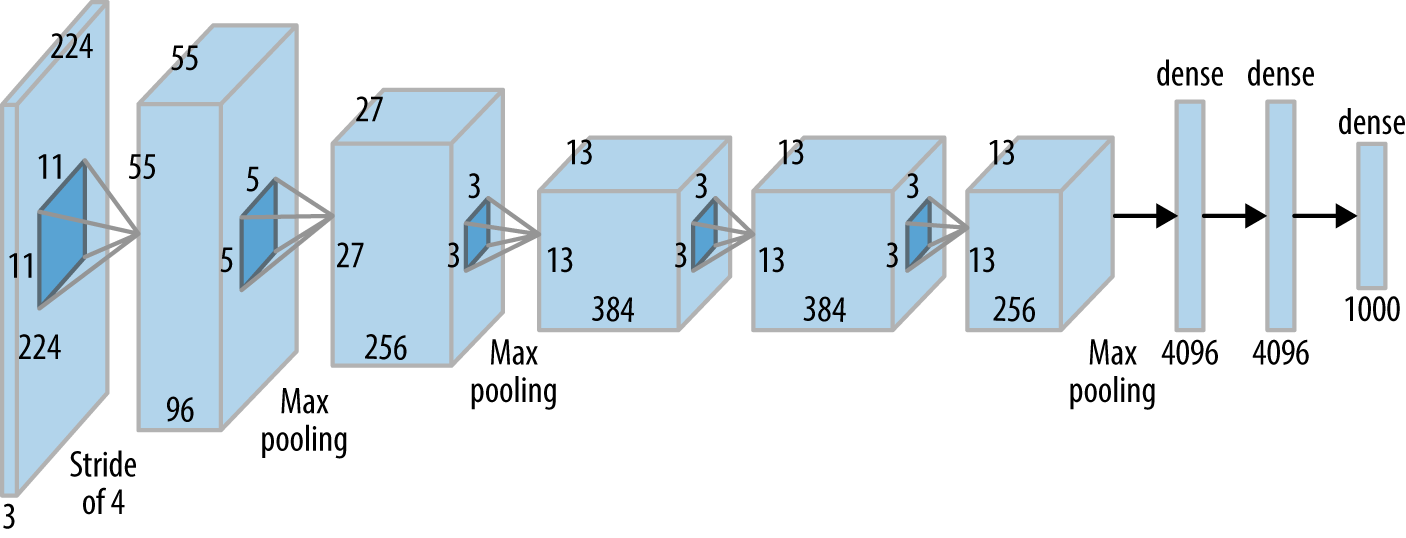

### Create the Alexnet architecture

In [27]:
model = tf.keras.models.Sequential([
    #Conv_1          #original model was built for input shape of 224X224
    tf.keras.layers.Conv2D(96, (11,11),strides=4, padding='valid', activation='relu', input_shape=(224, 224, 3)),
    # Pooling_1
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    # Batch Normalisation_1
    tf.keras.layers.BatchNormalization(),
    # Conv_2
    tf.keras.layers.Conv2D(256, (5,5),strides=1, padding='valid', activation='relu'),
    # Pooling_2
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    #Batch Normalisation_2
    tf.keras.layers.BatchNormalization(),
    # Conv_3
    tf.keras.layers.Conv2D(384, (3,3),strides=1, padding='valid', activation='relu'),
    # Batch Normalisation_3
    tf.keras.layers.BatchNormalization(),
    # Conv_4
    tf.keras.layers.Conv2D(384, (3,3),strides=1, padding='valid', activation='relu'),
    # Batch Normalisation_3
    tf.keras.layers.BatchNormalization(),
    #conv_5
    tf.keras.layers.Conv2D(256, (3,3),strides=1, padding='valid', activation='relu'),
    #pooling_3
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    #Batch Normalization_4
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    #Dense layer_1
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    #Dense layer_2
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    #Dense layer_3
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])


###Create the dataset by resizing the images to 224X224 for training Alexnet.

In [28]:
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [30]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      #callbacks = [checkpoint],
      verbose=2)

<ipython-input-30-ed117e3c06bb>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
100/100 - 36s - loss: 0.8905 - acc: 0.5290 - val_loss: 0.7161 - val_acc: 0.4550 - 36s/epoch - 361ms/step
Epoch 2/20
100/100 - 31s - loss: 0.8828 - acc: 0.5450 - val_loss: 0.6783 - val_acc: 0.5800 - 31s/epoch - 307ms/step
Epoch 3/20
100/100 - 31s - loss: 0.8555 - acc: 0.5585 - val_loss: 0.7462 - val_acc: 0.5000 - 31s/epoch - 315ms/step
Epoch 4/20
100/100 - 30s - loss: 0.8865 - acc: 0.5400 - val_loss: 0.8943 - val_acc: 0.5250 - 30s/epoch - 302ms/step
Epoch 5/20
100/100 - 31s - loss: 0.8555 - acc: 0.5545 - val_loss: 0.8374 - val_acc: 0.5550 - 31s/epoch - 310ms/step
Epoch 6/20
100/100 - 27s - loss: 0.8564 - acc: 0.5680 - val_loss: 0.8622 - val_acc: 0.5700 - 27s/epoch - 269ms/step
Epoch 7/20
100/100 - 30s - loss: 0.8699 - acc: 0.5595 - val_loss: 1.0335 - val_acc: 0.6100 - 30s/epoch - 298ms/step
Epoch 8/20
100/100 - 30s - loss: 0.8594 - acc: 0.5565 - val_loss: 0.9291 - val_acc: 0.5900 - 30s/epoch - 304ms/step
Epoch 9/20
100/100 - 28s - loss: 0.8440 - acc: 0.5455 - val_loss: 0.8083

### Visualization of results


This is just for illustration only. The actual accuracy may vary based on the number of epochs

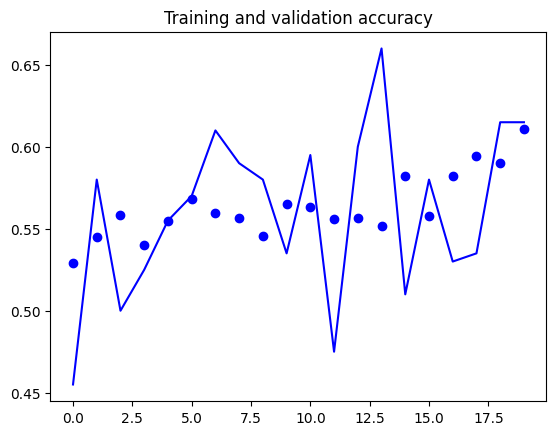

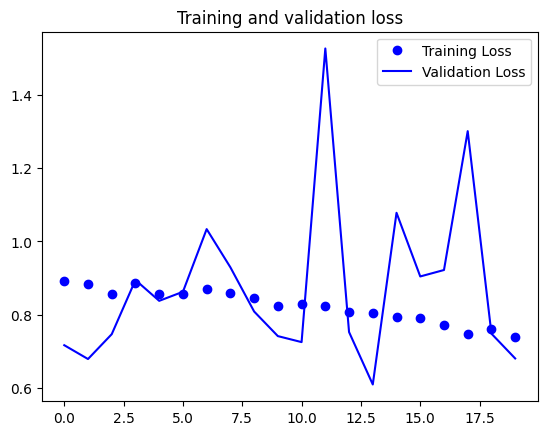

In [31]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()